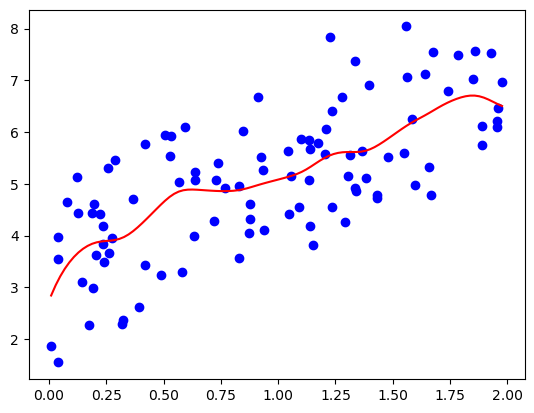

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, y, tau, x_query):
    w = np.diag(np.exp(-np.sum((x - x_query)**2, axis=1) / (2 * tau**2)))
    x_b = np.c_[np.ones((len(x), 1)), x]
    theta = np.linalg.pinv(x_b.T @ w @ x_b) @ x_b.T @ w @ y
    return np.array([1, x_query]) @ theta

np.random.seed(0)
x = np.sort((2 * np.random.rand(100, 1)).flatten())
y = (3 + 2 * x + np.random.randn(100)).flatten()

x_test = np.linspace(x.min(), x.max(), 100)
y_pred = [locally_weighted_regression(x[:, np.newaxis], y, 0.1, xq) for xq in x_test]

plt.scatter(x, y, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()